In [33]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
import numpy as np
from matplotlib import pyplot

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV


import warnings 
warnings.filterwarnings('ignore')



In [34]:

# Load train and test data
df1 = pd.read_csv('/Users/talalkhan/Documents/Data Sets/train.csv')
df2 = pd.read_csv('/Users/talalkhan/Documents/Data Sets/test.csv')


In [35]:
#do onehot encoding for categorical columns
df1 = pd.get_dummies(df1)
df2 = pd.get_dummies(df2)

In [37]:
scaler = MinMaxScaler()
cols_to_scale = df1.columns[df1.columns != 'RecordID']
temp = df1.loc[:, ['RecordID']]
df1 = pd.DataFrame(scaler.fit_transform(df1[cols_to_scale]), columns=scaler.get_feature_names_out())
df1 = pd.concat([temp, df1], axis=1, join='inner')

cols_to_scale = df2.columns[df2.columns != 'RecordID']
temp = df2.loc[:, ['RecordID']]
df2 = pd.DataFrame(scaler.fit_transform(df2[cols_to_scale]), columns=scaler.get_feature_names_out())
df2 = pd.concat([temp, df2], axis=1, join='inner')

In [36]:
#using simpleimputer to handle nan values
#df1
imr = SimpleImputer(missing_values=np.nan, strategy='mean')
imr = imr.fit(df1.values)
imputed_data1 = imr.transform(df1.values)
#df2
imr = SimpleImputer(missing_values=np.nan, strategy='mean')
imr = imr.fit(df2.values)
imputed_data2 = imr.transform(df2.values)

# convert the imputed NumPy array back into a Pandas DataFrame
df1 = pd.DataFrame(imputed_data1, columns=df1.columns)
df2 = pd.DataFrame(imputed_data2, columns=df2.columns)

In [38]:
#drop these columns in both columns ['hospital_id' 'apache_4a_hospital_death_prob' 'apache_3j_bodysystem_Gynecological' 'apache_3j_bodysystem_Metabolic''apache_2_bodysystem_Metabolic']
df1 = df1.drop(['hospital_id', 'apache_4a_hospital_death_prob', 'apache_3j_bodysystem_Gynecological', 'apache_3j_bodysystem_Metabolic','apache_2_bodysystem_Metabolic'], axis=1)
df2 = df2.drop(['hospital_id', 'apache_4a_hospital_death_prob', 'apache_3j_bodysystem_Gynecological', 'apache_3j_bodysystem_Metabolic','apache_2_bodysystem_Metabolic'], axis=1)


In [39]:
# Define features (X) and target (y) for training
X = df1.loc[:, df1.columns != 'hospital_death']
y = df1['hospital_death']

# Split training data into training and validation sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=2)

In [40]:
def fit_model(model, model_name):
    model.fit(trainX,trainy)
    md_probs = model.predict_proba(testX)
    md_probs = md_probs[:,1]
    md_auc = roc_auc_score(testy, md_probs)
    print(model_name, " : ", md_auc)
    md_fpr, md_tpr, _ = roc_curve(testy, md_probs)
    pyplot.plot(md_fpr, md_tpr, marker='.', label=model_name)
    #return (md_fpr, md_tpr)

Depth 5 Split 2  :  0.8480780371546917
Depth 7 Split 2  :  0.8454545082095243
Depth 5 Split 5  :  0.8480868854336785
Depth 7 Split 5  :  0.8450618836113882
Naive Bayes  :  0.8209428122926097


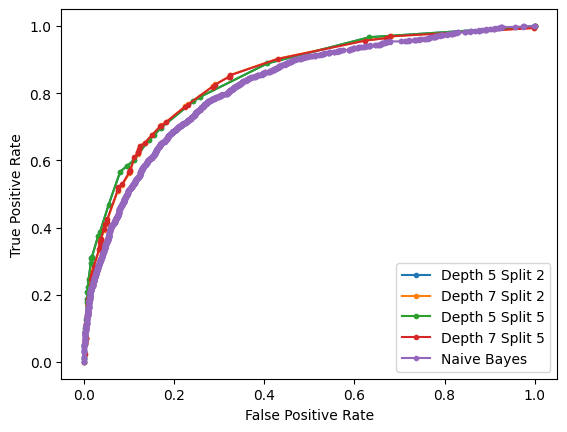

In [41]:
#trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3)#, random_state=2)
dt_5_2 = DecisionTreeClassifier(max_depth=5)  
fit_model(dt_5_2, "Depth 5 Split 2") 

dt_7_2 = DecisionTreeClassifier(max_depth=7)  
fit_model(dt_7_2, "Depth 7 Split 2") 

dt_5_5 = DecisionTreeClassifier(max_depth=5, min_samples_split=5)  
fit_model(dt_5_5, "Depth 5 Split 5") 

dt_7_5 = DecisionTreeClassifier(max_depth=7, min_samples_split=5)  
fit_model(dt_7_5, "Depth 7 Split 5") 

gnb = GaussianNB()
fit_model(gnb, "Naive Bayes") 

pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Naive Bayes  :  0.8209428122926097


'#X_cat = convert_categorical(df1)\ntrainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=2)\nnb_c = CategoricalNB()\nfit_model(nb_c, "Naive Bayes Categorical")\n\npyplot.xlabel(\'False Positive Rate\')\npyplot.ylabel(\'True Positive Rate\')\n# show the legend\npyplot.legend()\n# show the plot\npyplot.show()'

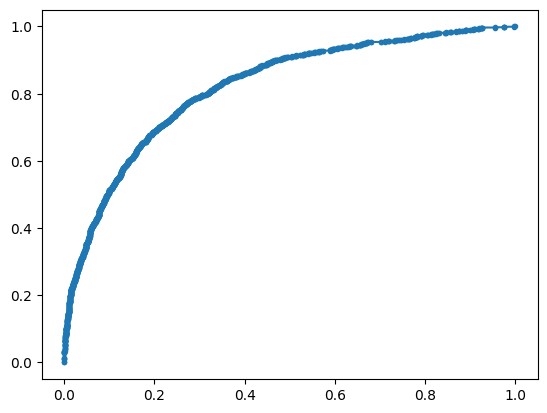

In [42]:
'''dt_5_2 = DecisionTreeClassifier(max_depth=5)  
fit_model(dt_5_2, "Depth 5 Split 2") 

dt_7_2 = DecisionTreeClassifier(max_depth=7)  
fit_model(dt_7_2, "Depth 7 Split 2") 

dt_5_5 = DecisionTreeClassifier(max_depth=5, min_samples_split=5)  
fit_model(dt_5_5, "Depth 5 Split 5") 

dt_7_5 = DecisionTreeClassifier(max_depth=7, min_samples_split=5)  
fit_model(dt_7_5, "Depth 7 Split 5") 
'''
gnb = GaussianNB()
fit_model(gnb, "Naive Bayes") 

'''#X_cat = convert_categorical(df1)
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=2)
nb_c = CategoricalNB()
fit_model(nb_c, "Naive Bayes Categorical")

pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()'''


In [ ]:
sfs = SequentialFeatureSelector(gnb, direction='forward',n_features_to_select=5, scoring='roc_auc')
sfs.fit(X, y)
print(sfs.get_feature_names_out())

In [43]:
#calculate predicted values for test data
#y_pred = gnb.predict_proba(df2)[:,1]

y_pred = gnb.predict_proba(df2)[:,1]


In [ ]:
# Create a DataFrame for the results with RecordID and predicted probability of death
results_df = pd.DataFrame({'RecordID': df2['RecordID'] , 'ProbaDeath': y_pred})

# Save the results to a CSV file
results_df.to_csv('submission30_25253.csv', index=False)
